In [328]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import style

UsageError: Line magic function `%` not found.


In [584]:
#Reading the Dataset
automobile = pd.read_csv('Automobile_data.csv')
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [331]:
#Getting the data types of the data set
automobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [332]:
#Statistics of the data set
automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Cleaning of the Data

In [333]:
#Find out if there are null fields
automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Cleaning the Normalized losses field

In [334]:
# Find out number of records having '?' value for normalized losses.
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()

41

In [335]:
# Setting the missing value to mean of normalized losses and convert the datatype to integer
nl = automobile['normalized-losses'].loc[automobile['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',nlmean).astype(int)
automobile['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int64

## Cleaning the Price data

In [336]:
# Find out the number of values which are not numeric
automobile['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [337]:
# List out the values which are not numeric
automobile['price'].loc[automobile['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [338]:
#Setting the missing value to mean of price and convert the datatype to integer
price = automobile['price'].loc[automobile['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile['price'] = automobile['price'].replace('?',pmean).astype(int)
automobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

## Cleaning the Horsepower

In [339]:
# Checking the numeric and replacing with mean value and convert the datatype to integer
automobile['horsepower'].str.isnumeric().value_counts()
horsepower = automobile['horsepower'].loc[automobile['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',hpmean).astype(int)

In [340]:
#Checking the outlier of horsepower
automobile.loc[automobile['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## Cleaning bore

In [341]:
# Find out the number of invalid value
automobile['bore'].loc[automobile['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [342]:
# Replace the non-numeric value to null and convert the datatype.
automobile['bore'] = pd.to_numeric(automobile['bore'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

## Cleaning the Stroke

In [343]:
# Replace the non-number value to null and convert the datatype
automobile['stroke'] = pd.to_numeric(automobile['stroke'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

## Cleaning Peak RPM data

In [344]:
# Convert the non-numeric data to null and convert the datatype
automobile['peak-rpm'] = pd.to_numeric(automobile['peak-rpm'],errors='coerce')
automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

## Cleaning the Num-of-doors data.

In [345]:
# remove the records which are having the value '?'
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']
automobile = automobile[automobile['num-of-doors'] != '?']
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [346]:
automobile

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470


# Now we can begin discovering insights!!

/var/folders/_2/s202dmbn69l8tld_v6klnvjh0000gn/T/ipykernel_40817/2701735512.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  automobile.hist(ax=ax, color='indianred', edgecolor='black')


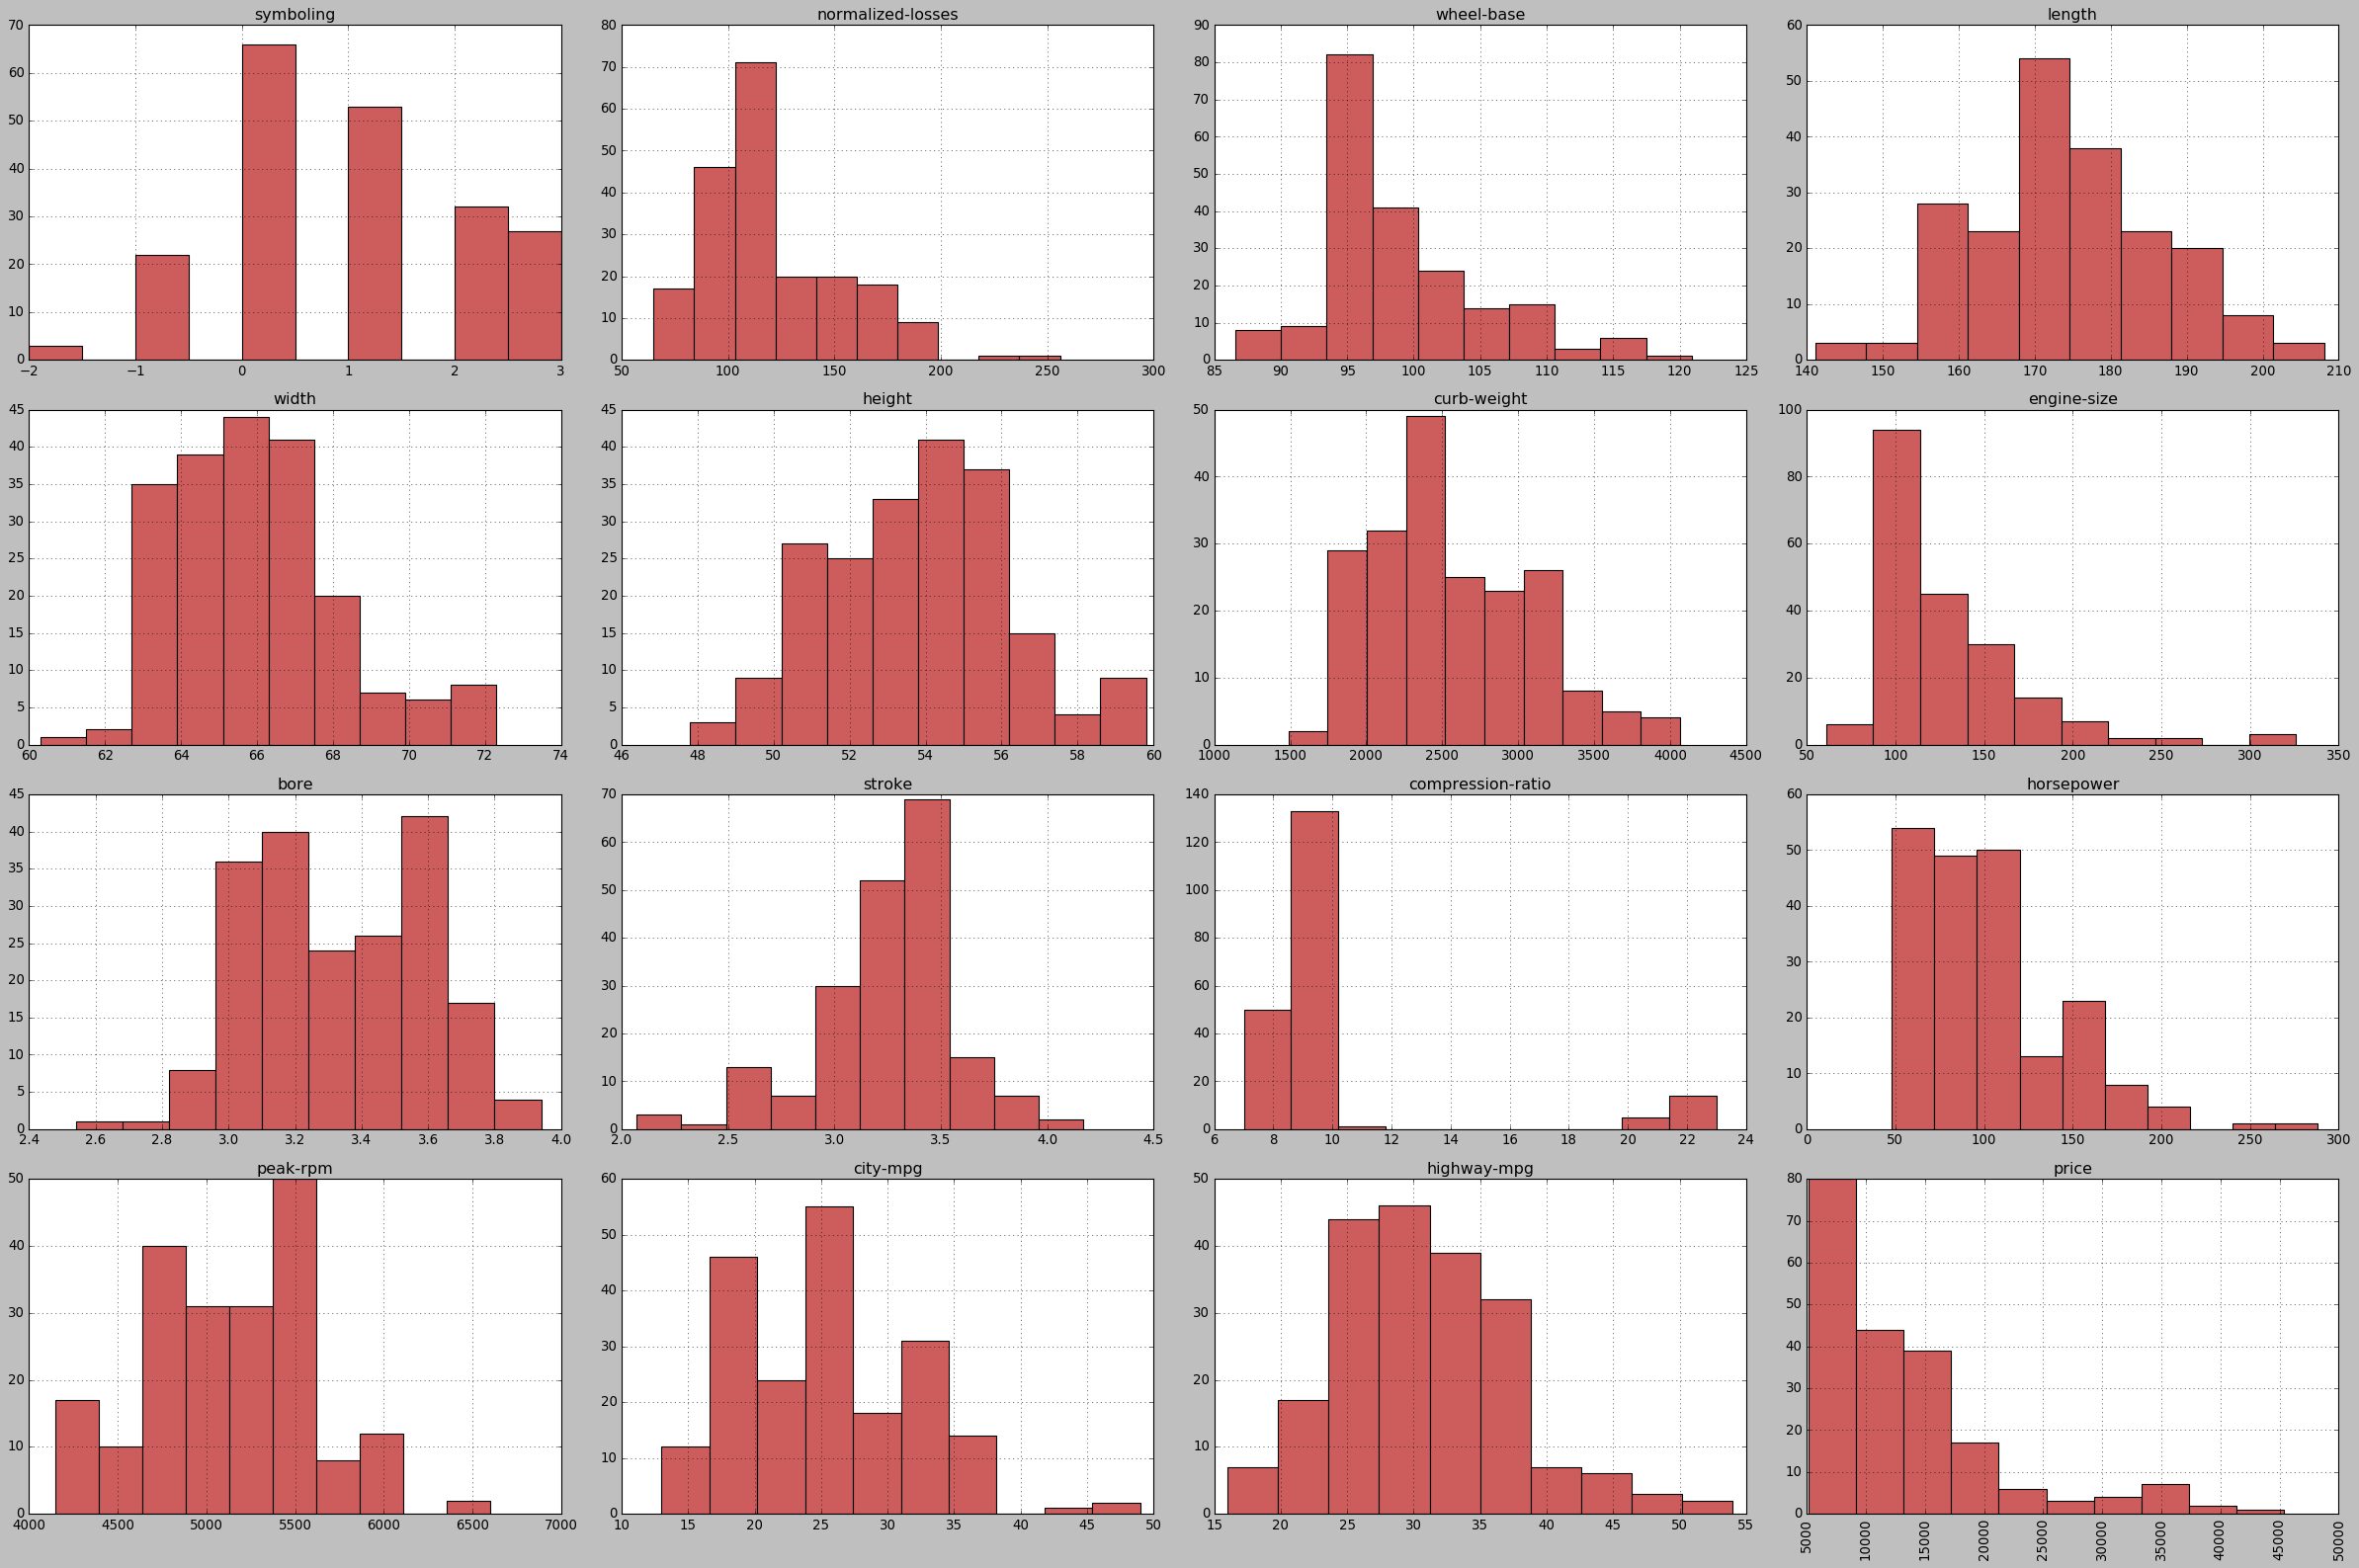

In [441]:
fig = plt.figure(figsize = (30,20))
ax = fig.gca()
plt.style.use('classic')
automobile.hist(ax=ax, color='indianred', edgecolor='black')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Above bar graphs shows value counts of different variables in the dataset

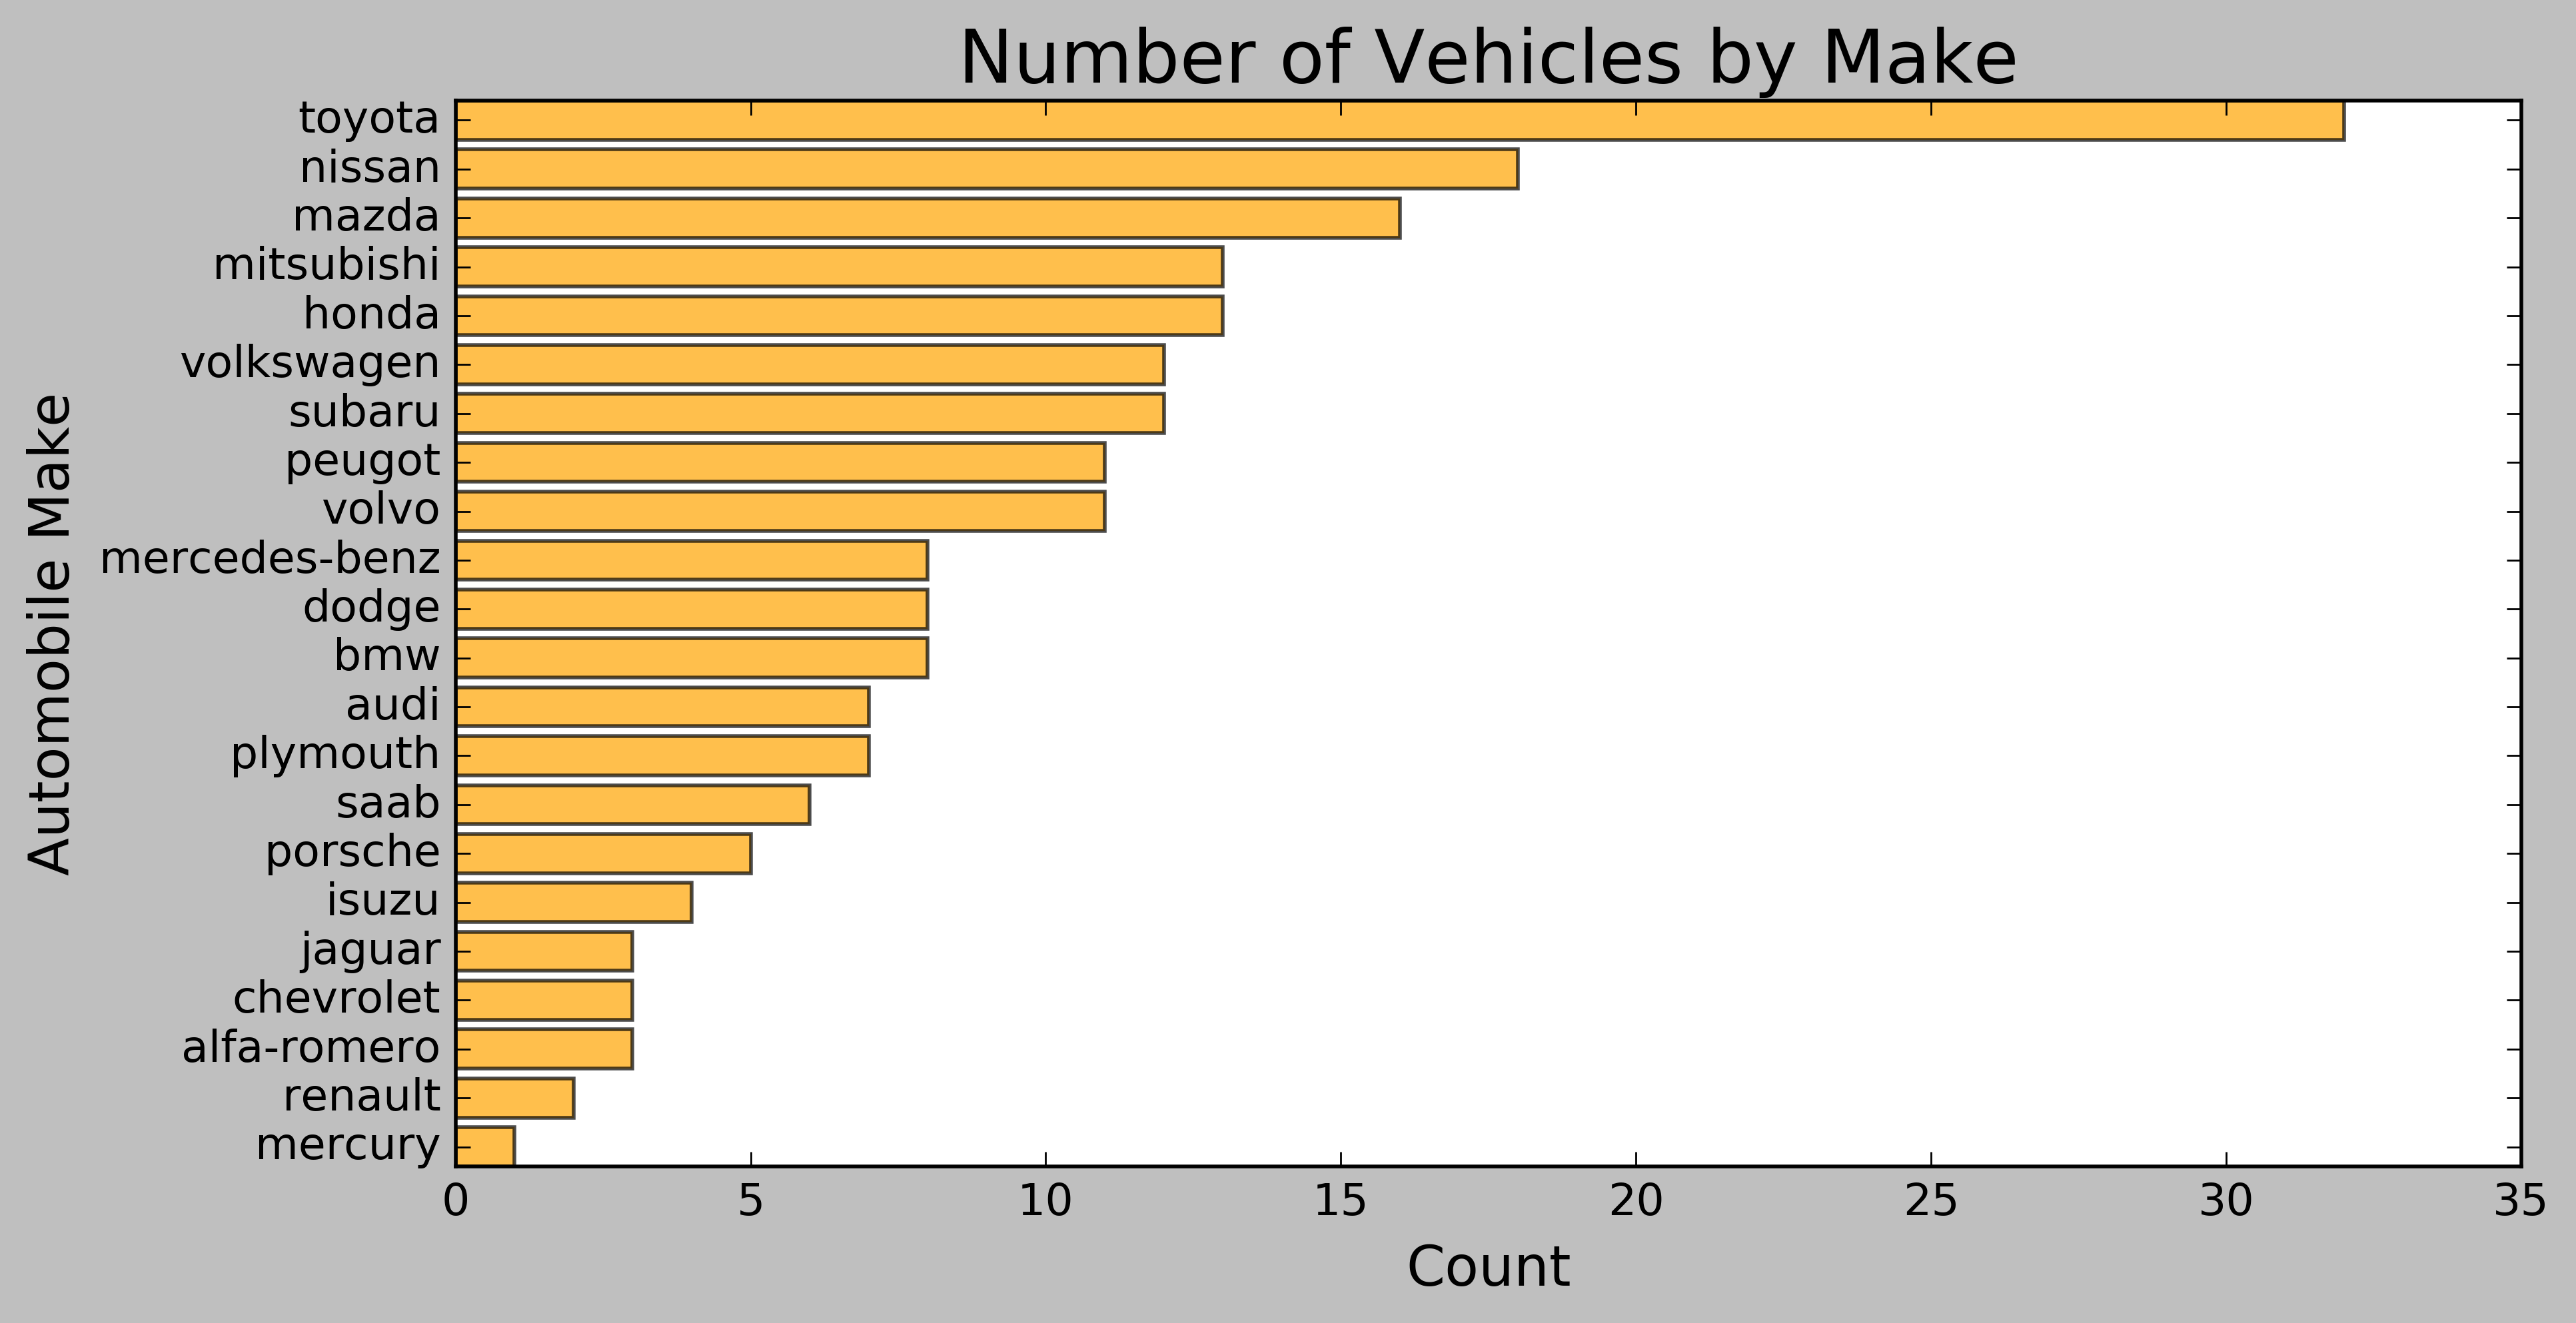

In [442]:
plt.figure(figsize=(10, 5), dpi=400)
x = automobile['make']
counts = x.value_counts()
plt.style.use('classic')
plt.barh(counts.index, counts.values, color='orange', alpha=0.7)

plt.gca().invert_yaxis()


plt.title("Number of Vehicles by Make",fontsize=20, color='black')
plt.xlabel('Count', fontsize=15, color='black')
plt.ylabel('Automobile Make', fontsize=15, color='black')

plt.show()

## From above frequency graph we can tell that Toyota has the most number of vehicles by a good margin.
## Second highest number of cars are from Nissan who have a bit more than half of Toyota's total number of cars. 
## Least number of vehicles are from Mercury.

![](https://media.tenor.com/dQXLIgsl7b4AAAAd/toyota-logo-cars.gif)

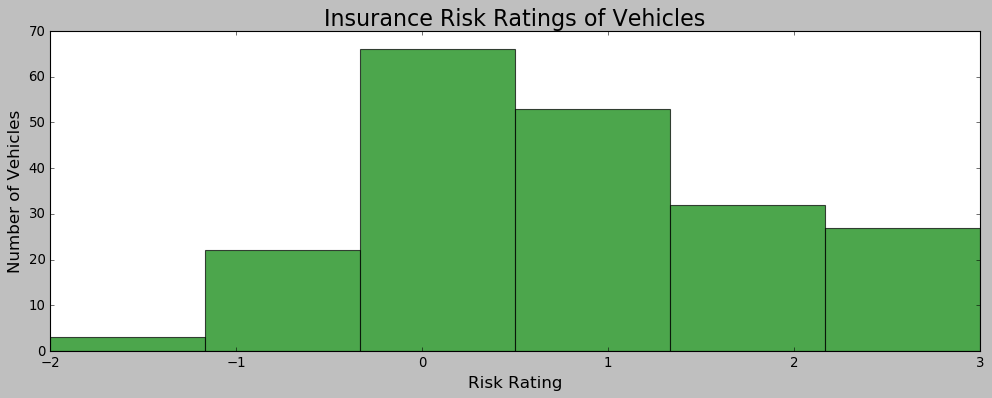

In [461]:
plt.figure(figsize=(15, 5))
x = automobile['symboling']
counts = x.value_counts()
plt.style.use('classic')
plt.hist(x, bins=6, color='green', alpha=0.7)



plt.title("Insurance Risk Ratings of Vehicles",fontsize=20, color='black')
plt.xlabel('Risk Rating', fontsize=15, color='black')
plt.ylabel('Number of Vehicles', fontsize=15, color='black')

plt.show()

## Symboling corresponds to a car's insurance risk level.
## Most of the car's insurance risk rating lies within 0 and 1. 
## very less number of cars come under 0 which is a good thing. 

Text(0.5, 0, 'Fuel type')

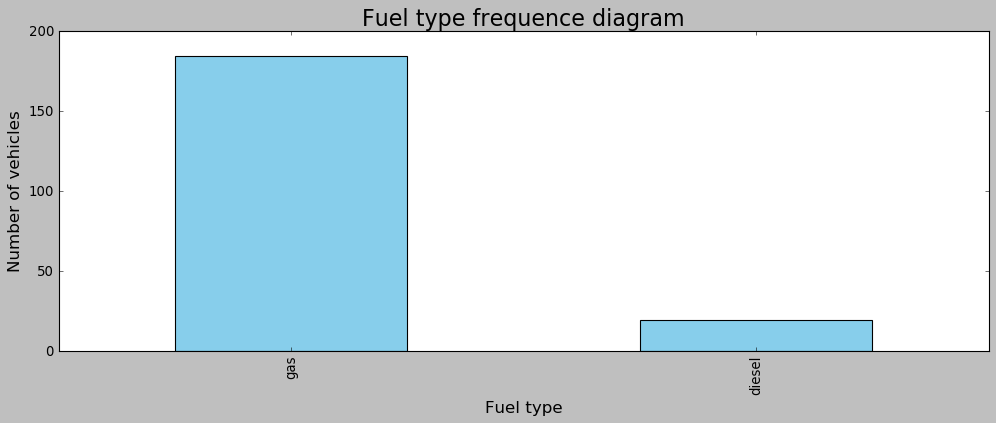

In [466]:
plt.figure(figsize=(15, 5))
automobile['fuel-type'].value_counts().plot(kind='bar', color='skyblue')
plt.style.use('classic')
plt.title("Fuel type frequence diagram", fontsize=20, color='black')
plt.ylabel('Number of vehicles', fontsize=15, color='black')
plt.xlabel('Fuel type', fontsize=15, color='black')

## Most vehicles run on gas as stated above.

![](https://media.tenor.com/ahoBMy2y3i0AAAAd/douse-in-gasoline-tim-commerford.gif)

Text(0.5, 0, 'Fuel type')

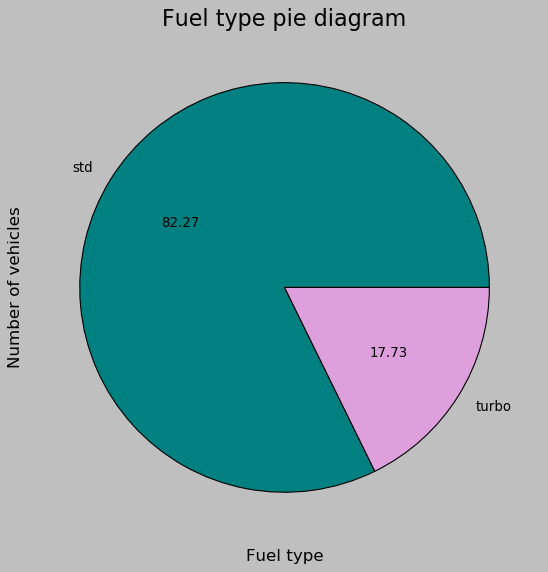

In [582]:
colors = ['teal', 'plum']
automobile['aspiration'].value_counts().plot.pie(figsize=(10, 8),colors=colors, autopct='%.2f')
plt.style.use('classic')
plt.title("Fuel type pie diagram", fontsize=20, color='black')
plt.ylabel('Number of vehicles', fontsize=15, color='black')
plt.xlabel('Fuel type', fontsize=15, color='black')

## Most vehicles (more than 80%) have standard fuel type.

Text(0.5, 1.0, 'Body Style pie diagram')

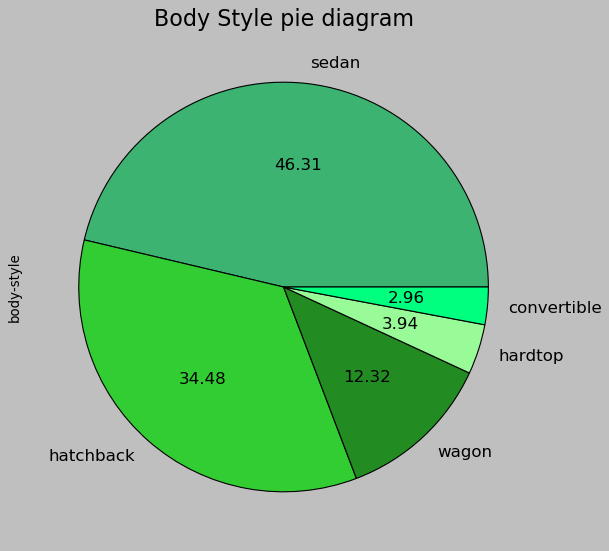

In [580]:
colors = ['mediumseagreen', 'limegreen', 'forestgreen', 'palegreen', 'springgreen']
automobile['body-style'].value_counts().plot.pie(figsize=(10, 8),fontsize=15,colors=colors, autopct='%.2f')
plt.style.use('classic')
plt.title("Body Style pie diagram", fontsize=20, color='black')

## Most vehicles are sedan in the lot, at almost 50%
## Least are convertible.

Text(0.5, 0, 'Horse power')

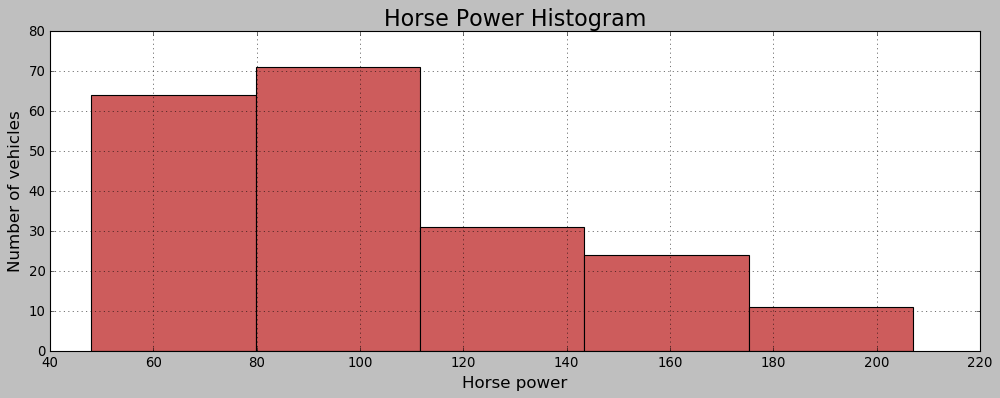

In [480]:
plt.figure(figsize=(15, 5))
automobile.horsepower[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())].hist(bins=5,color='indianred');
plt.title("Horse Power Histogram", fontsize=20, color='black')
plt.ylabel('Number of vehicles', fontsize=15, color='black')
plt.xlabel('Horse power', fontsize=15, color='black')

## Most vehicles have a horsepower between 30 - 110, with highest between 80 - 110.
## around 10 vehicles have horsepower more than 175, with highest upto 200.

![](https://media.tenor.com/9FlKINMmMVEAAAAd/its-got-a-lot-more-horse-power-that-youre-used-to-a-lot-of-horse-power.gif)

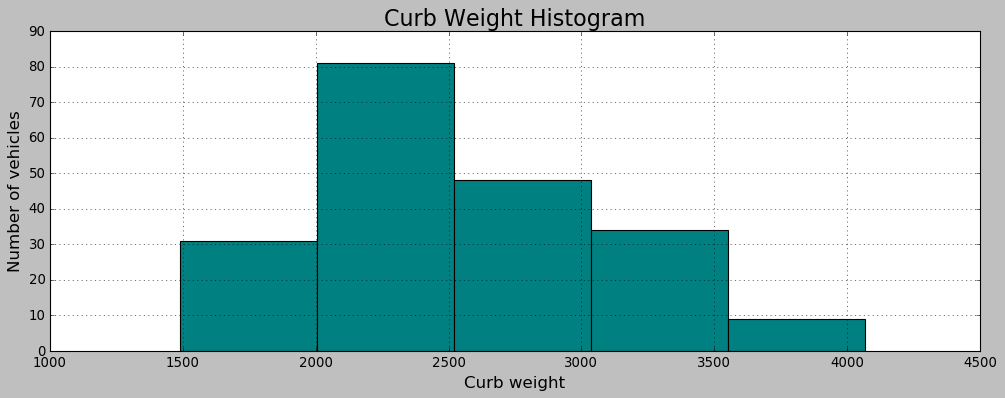

In [481]:
plt.figure(figsize=(15, 5))
automobile['curb-weight'].hist(bins=5,color='teal');
plt.title("Curb Weight Histogram", fontsize=20, color='black')
plt.ylabel('Number of vehicles', fontsize=15, color='black')
plt.xlabel('Curb weight', fontsize=15, color='black');

## Most vehicles have curb weight between 2000 - 3000, with highest between 2000 - 2500.
## Less than 10 vehicles have curb weight over 3500.

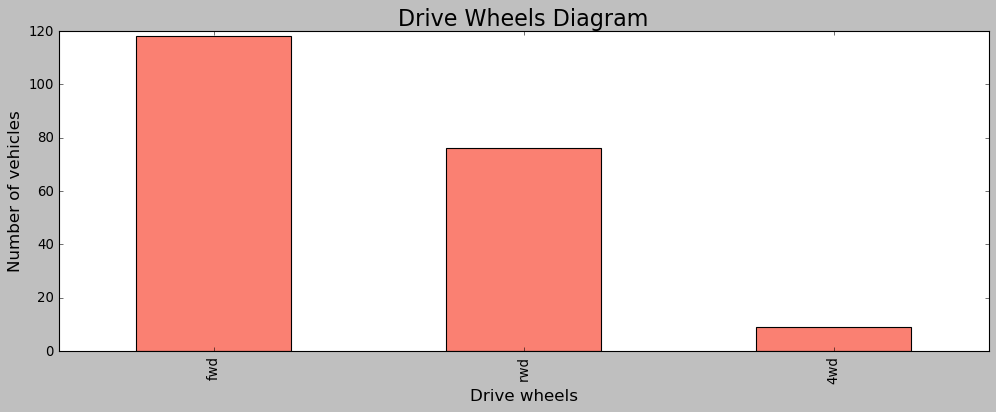

In [483]:
plt.figure(figsize=(15,5 ))
automobile['drive-wheels'].value_counts().plot(kind='bar',color='salmon')
plt.title("Drive Wheels Diagram", fontsize=20, color='black')
plt.ylabel('Number of vehicles', fontsize=15, color='black')
plt.xlabel('Drive wheels', fontsize=15, color='black');

## Most vehicles have forward wheel drive, a bit less than 120 vehicles.
## Least vehicles have 4 wheel drive, a bit less than 10 vehicles.

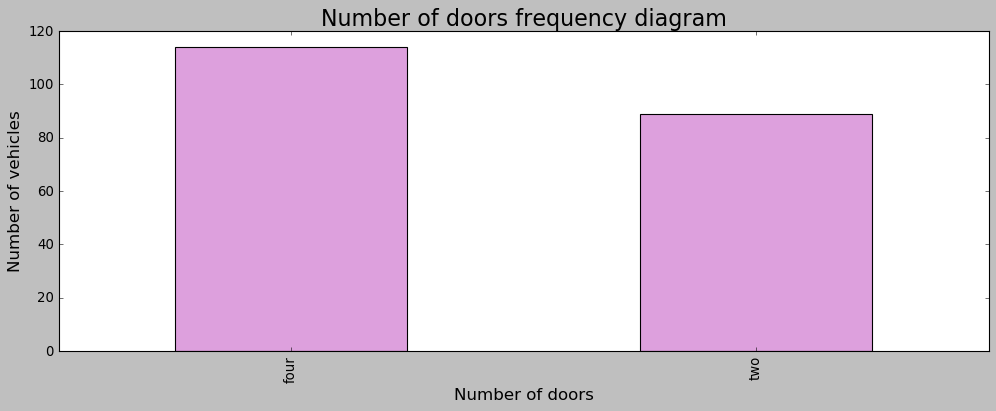

In [484]:
plt.figure(figsize=(15, 5))
automobile['num-of-doors'].value_counts().plot(kind='bar',color='plum')
plt.title("Number of doors frequency diagram", fontsize=20, color='black')
plt.ylabel('Number of vehicles', fontsize=15, color='black')
plt.xlabel('Number of doors', fontsize=15, color='black');

## Most vehicles have 4 doors.
## Vehicles with 2 doors are not also less with being more than 80.¶

![](https://media.tenor.com/fJZIw9ACgsEAAAAC/cardoor-car.gif)

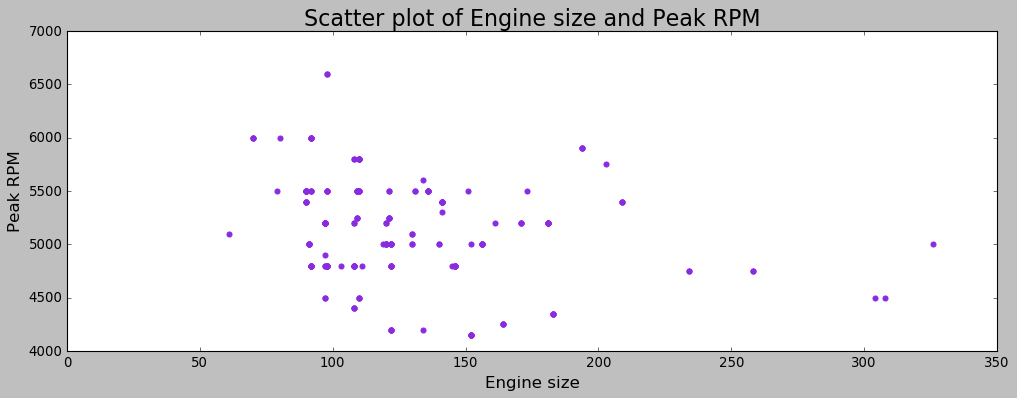

In [488]:
plt.figure(figsize=(15, 5))
plt.scatter(automobile['engine-size'],automobile['peak-rpm'],color='blueviolet')
plt.title("Scatter plot of Engine size and Peak RPM", fontsize=20, color='black')
plt.xlabel('Engine size', fontsize=15, color='black')
plt.ylabel('Peak RPM', fontsize=15, color='black');

## Above scatter plot shows most cars lie between 100 - 150 engine size and 4750 - 5500 peak RPM.

## The correlation is weak and negative.

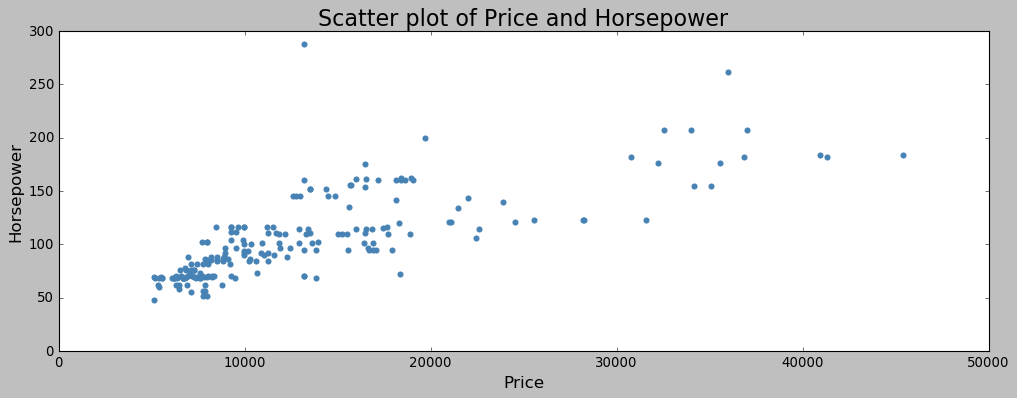

In [491]:
plt.figure(figsize=(15, 5))
plt.scatter(automobile['price'],automobile['horsepower'],color='steelblue')
plt.title("Scatter plot of Price and Horsepower", fontsize=20, color='black')
plt.xlabel('Price', fontsize=15, color='black')
plt.ylabel('Horsepower', fontsize=15, color='black');

## Above scatter plot between Horsepower and Price show a positive correlation, telling as when Horsepower increases, price also increases.

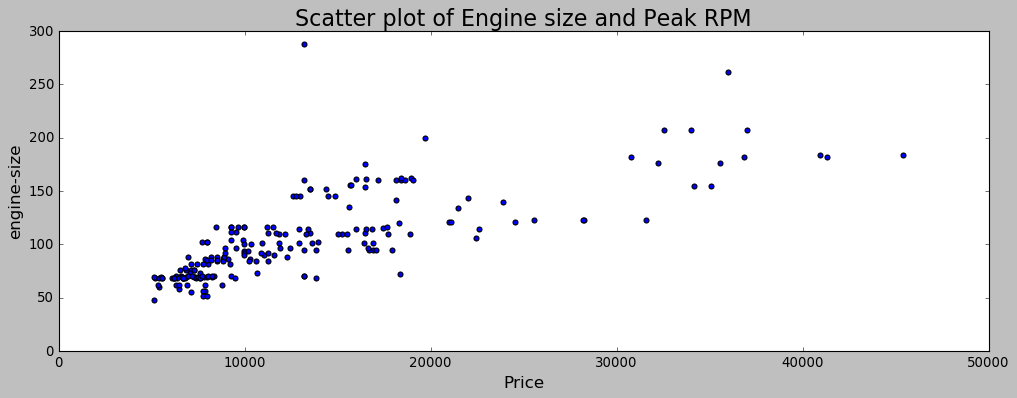

In [492]:
plt.figure(figsize=(15, 5))
plt.scatter(automobile['price'],automobile['horsepower'])
plt.title("Scatter plot of Engine size and Peak RPM", fontsize=20, color='black')
plt.xlabel('Price', fontsize=15, color='black')
plt.ylabel('engine-size', fontsize=15, color='black');

## Above scatter plot between Engine-size and Price show a positive correlation, telling as when Engine-size increases, price also increases.

<Figure size 1200x400 with 0 Axes>

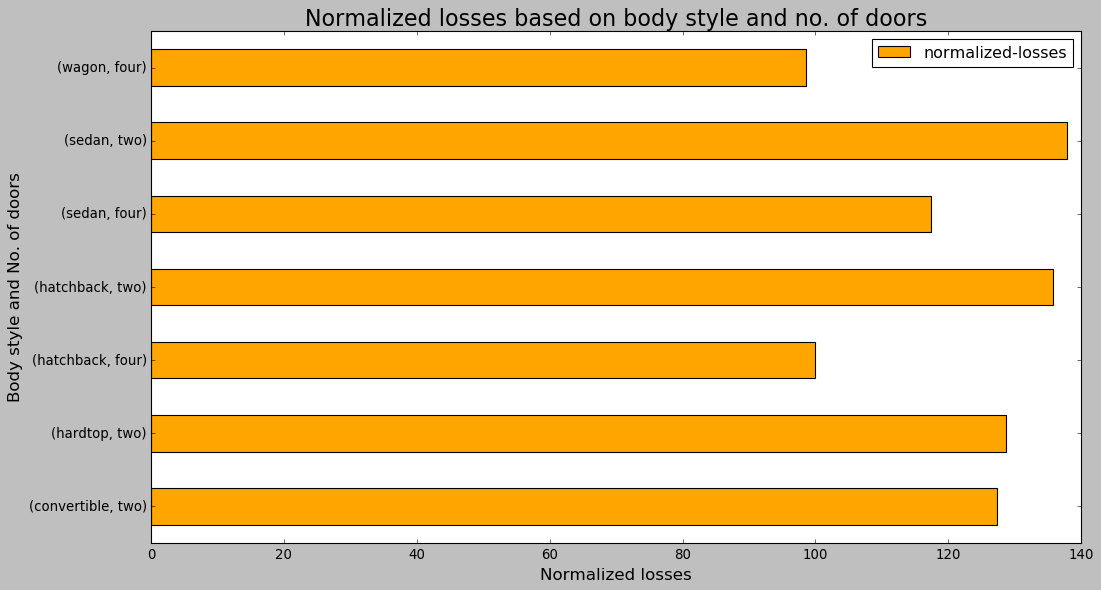

In [501]:
plt.figure(figsize=(15, 5))
pd.pivot_table(automobile,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='barh',color='orange')
plt.title("Normalized losses based on body style and no. of doors", fontsize=20, color='black')
plt.ylabel('Body style and No. of doors', fontsize=15, color='black')
plt.xlabel('Normalized losses', fontsize=15, color='black');

## Normalized-losses is the relative average loss payment per insured vehicle year. This figure is normalised for all vehicles within a given size category (two-door, small, station wagons, sports/specialty, etc…) and represents the average loss per vehicle per year.
## According to above graph 2 door sedan cars and 2 door hatchback cars have the most normalised losses to the manufacturer.
## The above graph also shows 4 door wagon cars and 4 door hatchback cars have the least normalised losses manufacturer.

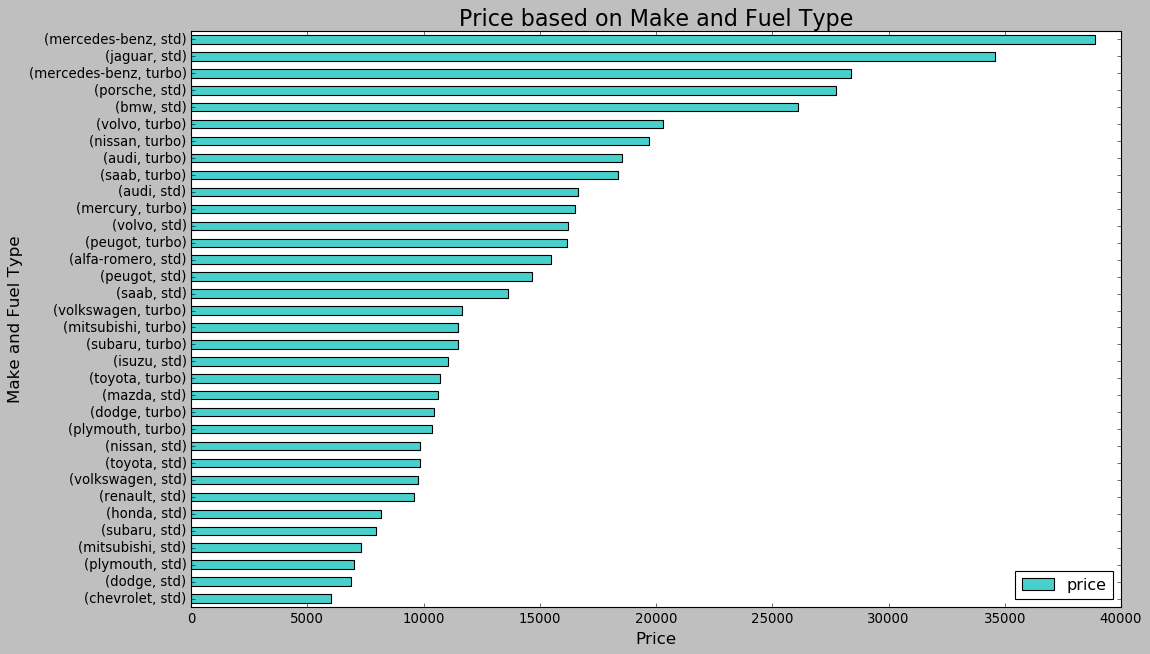

In [548]:
plt.rcParams["figure.figsize"] = (15,9)
pd.pivot_table(automobile,index=['make','aspiration'], values='price').sort_values(by='price', ascending=True).plot(kind='barh',color='mediumturquoise')
plt.title("Price based on Make and Fuel Type", fontsize=20, color='black')
plt.ylabel('Make and Fuel Type', fontsize=15, color='black')
plt.xlabel('Price', fontsize=15, color='black');

plt.show()

## Above bar plot shows Mercedes bens are the most expensive make in both standard and turbo fuel types. The most expensive being Mercedes turbo over 35000. 

## Cheapest vehicle in the lot is standard chevrolet which is a bit more than 5000. 

![](https://media.tenor.com/u521gcBhjXgAAAAd/mercedes-benz-r-class-mercedes-benz.gif)

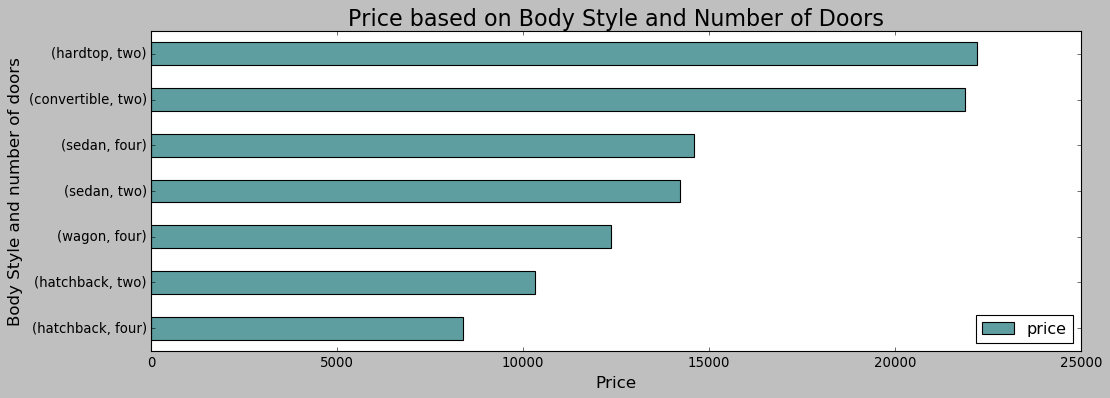

In [503]:
plt.rcParams["figure.figsize"] = (15,5)
colors = ['cadetblue', 'lightsteelblue', 'mediumaquamarine', 'skyblue', 'powderblue']
pd.pivot_table(automobile,index=['body-style','num-of-doors'], values='price').sort_values(by='price', ascending=True).plot(kind='barh',color=colors)
plt.title("Price based on Body Style and Number of Doors", fontsize=20, color='black')
plt.ylabel('Body Style and number of doors', fontsize=15, color='black')
plt.xlabel('Price', fontsize=15, color='black');

plt.show()

## Hardtop cars with 2 doors are the most expensive in the lot followed by convertible with 2 doors.
## Hatchbacks are the cheapest in the batch. 
## There are no convertibles with 4 doors in the lot.
## There are no wagons with 2 doors in the lot.

/var/folders/_2/s202dmbn69l8tld_v6klnvjh0000gn/T/ipykernel_40817/4250776628.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  automobile.groupby(by = 'body-style').sum()['price'].plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, wedgeprops={'width': 0.3})


Text(0.5, 1.0, 'Body Style wise Total Price')

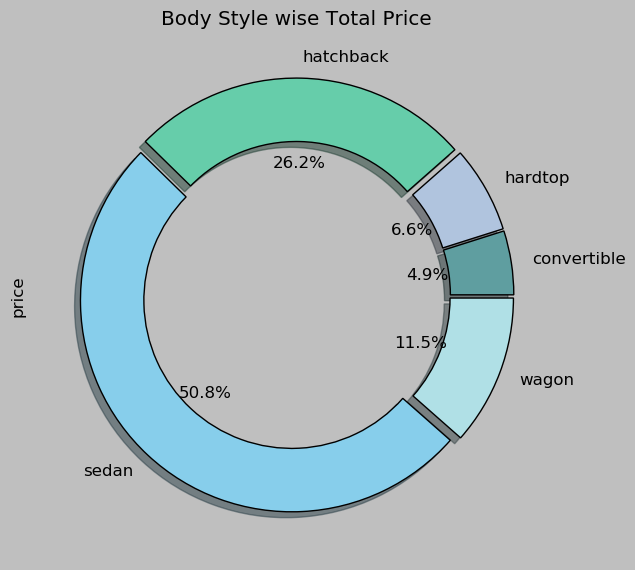

In [535]:
fig = plt.figure(figsize=(15,8), dpi=100)
ax1 = plt.subplot2grid((1,2),(0,0))
colors = ['cadetblue', 'lightsteelblue', 'mediumaquamarine', 'skyblue', 'powderblue']
explode = (0.03, 0.03, 0.03, 0.03, 0.03)
automobile.groupby(by = 'body-style').sum()['price'].plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, wedgeprops={'width': 0.3})
plt.title('Body Style wise Total Price')

## Sedan cars gives around 50% of the total price of all the cars in the lot.
## convertible gives less than 5% to the total price of all the cars. 

/var/folders/_2/s202dmbn69l8tld_v6klnvjh0000gn/T/ipykernel_40817/2220661394.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  automobile.groupby(by = 'num-of-cylinders').sum()['price'].plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, wedgeprops={'width': 0.3})


Text(0.5, 1.0, 'Number of Cylinders wise Total Price')

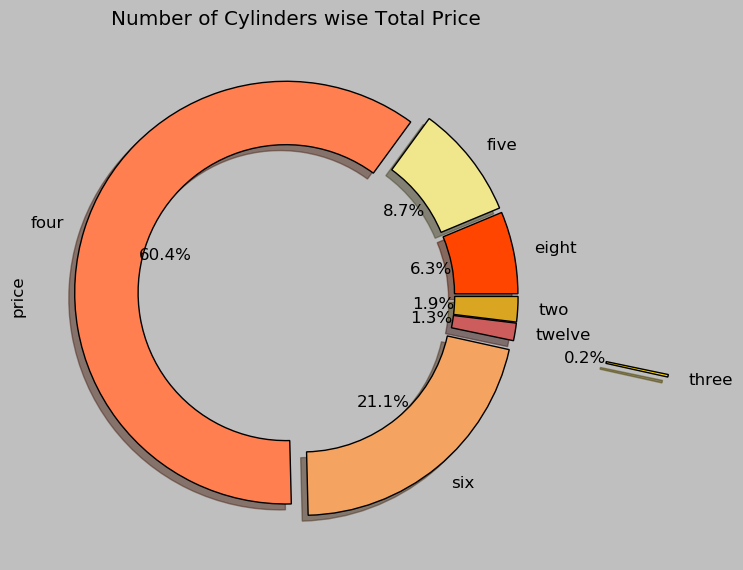

In [583]:
fig = plt.figure(figsize=(15,8), dpi=100)
ax1 = plt.subplot2grid((1,2),(0,0))
colors = ['orangered', 'khaki', 'coral', 'sandybrown', 'gold', 'indianred', 'goldenrod']
explode = (0.05, 0.05, 0.05, 0.05, 0.8, 0.05, 0.05)
automobile.groupby(by = 'num-of-cylinders').sum()['price'].plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, wedgeprops={'width': 0.3})
plt.title('Number of Cylinders wise Total Price')

## Above donut chart shows that vehicles with 4 cylinders give upto 60% of total price of the cars in the lot.
## Vehicles with 3 cylinders give the lease to the total price, only 0.2%. I have set it at more explode than the rest to make it more visible.


# -------------------------------------------------------------------------------------------

# Findings
## We have taken some key features of the automobile dataset for this analysis and below are our findings.

## - Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan
## - Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
## - For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.
## - Curb weight of the cars are distributed between 1500 and 4000 approximately
## - Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.
## - Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.
## - Most expensive brand in the lot is mercedes benz, even though they are less than 10 in number.
## - Sedan gives the most to the total price in the lot.
## - As horsepower and engine size increases, price also increases.
## - Most vehicles in the lot are forward wheel drive.

# -----------------------------------------FIN----------------------------------------------